In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [79]:
titanic_df = pd.read_csv('data/pandas/titanic.csv')
# titanic_df.head()

In [80]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 :', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 : 0


In [81]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print('성별 값 분포 :\n', titanic_df['Sex'].value_counts())
print('선실 값 분포 :\n', titanic_df['Cabin'].value_counts())
print(' 값 분포 :\n', titanic_df['Embarked'].value_counts())

성별 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64
선실 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [82]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [10]:
titanic_df['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

lb_enc = LabelEncoder()

lb_enc.fit(titanic_df['Sex'])

enc = lb_enc.transform(titanic_df['Sex'])

titanic_df['Sex_enc'] = enc

In [13]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1


In [18]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()

oh_enc.fit(titanic_df[['Sex']])

enc = oh_enc.transform(titanic_df[['Sex']])

titanic_df[['female', 'male']] = enc.toarray()

# concat
# pd.concat([titanic_df, 
#            pd.DataFrame(enc.toarray(), columns = ['female', 'male'])],
#           axis = 1)

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,1,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1,0.0,1.0


In [ ]:
# 범주형 > 숫자형 바꿔줘야한다.
# labelencoder, onehotencoder가 있다.
# label : 종속변수가 범주형, 독립변수임에도 2개의 범주를 가질때는 사용가능
# onehot : 독립변수가 범주형


In [20]:
# onehot인코딩 결과 지우기
titanic_df.drop(['female', 'male'], axis = 1, inplace=True)

In [22]:
# Cabin, Embarked

oh_enc = OneHotEncoder()
result = oh_enc.fit_transform(titanic_df[['Cabin', 'Embarked']])
print(result.toarray().shape)
result.toarray()

(891, 13)


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [30]:
columns = np.hstack(['Cab_' + oh_enc.categories_[0], 'Emb_' + oh_enc.categories_[1]])

In [32]:
on_result = pd.DataFrame(result.toarray(), columns = columns)

In [35]:
titanic_df = pd.concat([titanic_df, on_result], axis = 1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_N,Cab_T,Emb_C,Emb_N,Emb_Q,Emb_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [36]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_enc', 'Cab_A',
       'Cab_B', 'Cab_C', 'Cab_D', 'Cab_E', 'Cab_F', 'Cab_G', 'Cab_N', 'Cab_T',
       'Emb_C', 'Emb_N', 'Emb_Q', 'Emb_S'],
      dtype='object')

In [37]:
titanic_df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [38]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_enc,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_N,Cab_T,Emb_C,Emb_N,Emb_Q,Emb_S
0,0,3,22.0,1,0,7.2500,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [39]:
titanic = pd.read_csv('data/pandas/titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [40]:
# 누락값
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('N', inplace=True)
titanic['Embarked'].fillna('N', inplace=True)

# 범주형 데이터 만들기
titanic['Cabin'] = titanic['Cabin'].str[:1]

In [ ]:
titanic.drop(['Passeng

In [ ]:
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True)

In [51]:
titanic['Pclass'] = titanic['Pclass'].astype('object')
titanic = pd.get_dummies(titanic)

In [45]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_enc,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_N,Cab_T,Emb_C,Emb_N,Emb_Q,Emb_S
0,0,3,22.000000,1,0,7.2500,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.000000,0,0,7.9250,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.000000,1,0,53.1000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,35.000000,0,0,8.0500,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0,3,29.699118,1,2,23.4500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,1,1,26.000000,0,0,30.0000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_enc,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_N,Cab_T,Emb_C,Emb_N,Emb_Q,Emb_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.771044,0.001122,0.188552,0.002245,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.420397,0.033501,0.391372,0.047351,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaler.fit(titanic_df[['Age', 'SibSp', 'Parch', 'Fare']])
# scaler.transform(titanic_df[['Age', 'SibSp', 'Parch', 'Fare']])
result = scaler.fit_transform(titanic_df[['Age', 'SibSp', 'Parch', 'Fare']])
titanic_df[['Age', 'SibSp', 'Parch', 'Fare']] = result
titanic_df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_enc,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_N,Cab_T,Emb_C,Emb_N,Emb_Q,Emb_S
0,0,3,-0.592481,0.432793,-0.473674,-0.502445,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0.638789,0.432793,-0.473674,0.786845,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,-0.284663,-0.474545,-0.473674,-0.488854,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [49]:
titanic_df[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.232906e-16,4.386066e-17,5.382900e-17,3.987333e-18
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00


In [52]:
titanic

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
1,1,38.000000,1,0,71.2833,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,1,26.000000,0,0,7.9250,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,1,35.000000,1,0,53.1000,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,0,35.000000,0,0,8.0500,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
887,1,19.000000,0,0,30.0000,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
888,0,29.699118,1,2,23.4500,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
889,1,26.000000,0,0,30.0000,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False


In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

result = scaler.fit_transform(titanic[['Age', 'SibSp', 'Parch', 'Fare']])
titanic[['Age', 'SibSp', 'Parch', 'Fare']] = result
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,0,0.271174,0.125,0.0,0.014151,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
1,1,0.472229,0.125,0.0,0.139136,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,1,0.321438,0.000,0.0,0.015469,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True


<Axes: xlabel='Fare', ylabel='Count'>

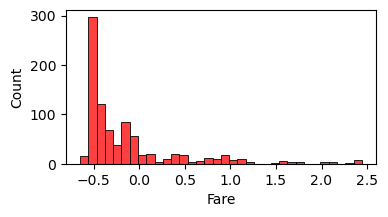

In [58]:
import seaborn as sns
plt.figure(figsize=(4,2))
sns.histplot(data = titanic_df[titanic_df['Fare'] <= 2.5], x = 'Fare', color='red')

<Axes: xlabel='Fare', ylabel='Count'>

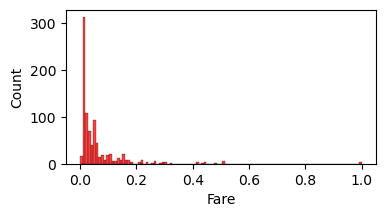

In [57]:
plt.figure(figsize=(4,2))
sns.histplot(data = titanic, x = 'Fare', color='red')

<Axes: xlabel='Age', ylabel='Count'>

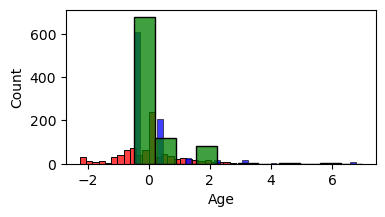

In [60]:
plt.figure(figsize=(4,2))
sns.histplot(data = titanic_df, x = 'Age', color='red')
sns.histplot(data = titanic_df, x = 'SibSp', color='blue')
sns.histplot(data = titanic_df, x = 'Parch', color='green')

In [83]:
y = titanic_df['Survived']
X = titanic_df.iloc[:, 1:]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=11)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 11) (179, 11) (712,) (179,)


In [67]:
# 모델 선정
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)

# 학습
dt_clf.fit(X_train, y_train)

# 예측
pred = dt_clf.predict(X_test)

# 평가
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred))

0.8268156424581006


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver='liblinear')

In [69]:
# DecisionTreeClassfier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
acc = accuracy_score(y_test, dt_pred)
print(f'DecisionTree 정확도 : {acc:.4f}' )

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, rf_pred)
print(f'RandomForest 정확도 : {acc:.4f}' )

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
acc = accuracy_score(y_test, lr_pred)
print(f'Logistic 정확도 : {acc:.4f}' )

DecisionTree 정확도 : 0.8268
RandomForest 정확도 : 0.8492
Logistic 정확도 : 0.8492


In [70]:
from sklearn.model_selection import cross_val_score

dt_clf = DecisionTreeClassifier(random_state=11)
# X_train, X
score = cross_val_score(dt_clf, X_train, y_train, scoring='accuracy', cv = 7)
print(np.mean(score))
print(np.round(score, 4))

0.7780458718140721
[0.7255 0.7353 0.8039 0.8137 0.8431 0.7723 0.7525]


In [71]:
rf_clf = RandomForestClassifier(random_state=11)
score = cross_val_score(rf_clf, X_train, y_train, scoring='accuracy', cv = 7)
print(np.mean(score))
print(np.round(score, 4))

0.7836758465762542
[0.7549 0.7549 0.7941 0.7745 0.8627 0.8119 0.7327]


In [72]:
rf_clf = LogisticRegression(solver='liblinear')
score = cross_val_score(rf_clf, X_train, y_train, scoring='accuracy', cv = 7)
print(np.mean(score))
print(np.round(score, 4))

0.7809024599938984
[0.7353 0.7647 0.8039 0.7941 0.8039 0.8218 0.7426]


In [73]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=7)
dt_clf = DecisionTreeClassifier(random_state=11)
acc = []
for train_index, test_index in kfold.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    acc.append(round(accuracy_score(y_test, pred), 4))

print(acc)
print(np.mean(acc))

[0.7656, 0.7344, 0.7874, 0.7953, 0.8268, 0.7795, 0.8268]
0.7879714285714287


In [ ]:
0.7780458718140721
[0.7255 0.7353 0.8039 0.8137 0.8431 0.7723 0.7525]

In [88]:
from sklearn.base import BaseEstimator
# 남성이면 사망, 여성이면 생존으로 예측하는 모델
class MyDummyClassifier(BaseEstimator):
     
    def predict(self, X):
        
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 'male':
                pred[i] = 0
            else:
                pred[i] = 1
        return pred.reshape(-1)

model = MyDummyClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8324022346368715

In [90]:
# 학습시 아무런 행동을 하지않고 0으로 예측하는 모델 생성
class MyFakeClassifier(BaseEstimator):
    def predict(self,X):
        return np.zeros( (len(X), 1))

fakeclf = MyFakeClassifier()
fakeclf.predict(X_test)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [94]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data)
print(digits.data.shape)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[0 1 2 ... 8 9 8]


In [95]:
y = (digits.target == 7).astype(int)

In [97]:
np.unique(y)

array([0, 1])

In [98]:
pred = fakeclf.predict(digits.data)
accuracy_score(y, pred)

0.9003895381190874

In [99]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y).value_counts())
# 생성한 모델로 학습/예측/평가
fakeclf = MyFakeClassifier()
fakepred = fakeclf.predict(digits.data)
print(f'정확도:{accuracy_score(y , fakepred):.3f}')

레이블 테스트 세트 크기 : (1797,)
테스트 세트 레이블 0 과 1의 분포도
0    1618
1     179
Name: count, dtype: int64
정확도:0.900


<Axes: ylabel='count'>

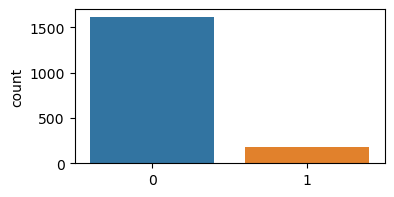

In [102]:
import seaborn as sns
plt.figure(figsize=(4,2))
sns.countplot(x = y)

<Axes: ylabel='count'>

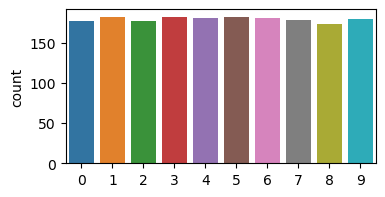

In [104]:
plt.figure(figsize=(4,2))
sns.countplot(x = digits.target)